#                                            MYERS-BRIGGS TEST

### The Myers-Briggs Personality Type Indicator is a self-report inventory designed to identify a person's 
### personality type, strengths, and preferences. The questionnaire was developed by Isabel Myers and her 
### mother Katherine Briggs based on their work with Carl Jung's theory of personality types. Today, the MBTI
### inventory is one of the most widely used psychological instruments in the world.

## The questionnaire itself is made up of four different scales.

### 1->Extroversion (E) – Introversion (I)

### 2->Sensing (S) – Intuition (N)

### 3->Thinking (T) – Feeling (F)

### 4->Judging (J) – Perceiving (P)

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re
from sklearn.metrics import accuracy_score
%matplotlib inline

## IMPORTING DATASET

In [2]:
os.chdir(r"C:\Users\Manav\Desktop\keshav")
df = pd.read_csv("mbti_1.csv")
data = df
print(data.head(10))

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


##                                                           PERSONALITY TYPES

In [3]:
c= 0
for i in data['type'].unique():
    c = c+1
    print(str(c)+ " ->" + i)

1 ->INFJ
2 ->ENTP
3 ->INTP
4 ->INTJ
5 ->ENTJ
6 ->ENFJ
7 ->INFP
8 ->ENFP
9 ->ISFP
10 ->ISTP
11 ->ISFJ
12 ->ISTJ
13 ->ESTP
14 ->ESFP
15 ->ESTJ
16 ->ESFJ


##                         DISTRIBUTION OF PERSONALITY TYPES USING BAR GRAPH

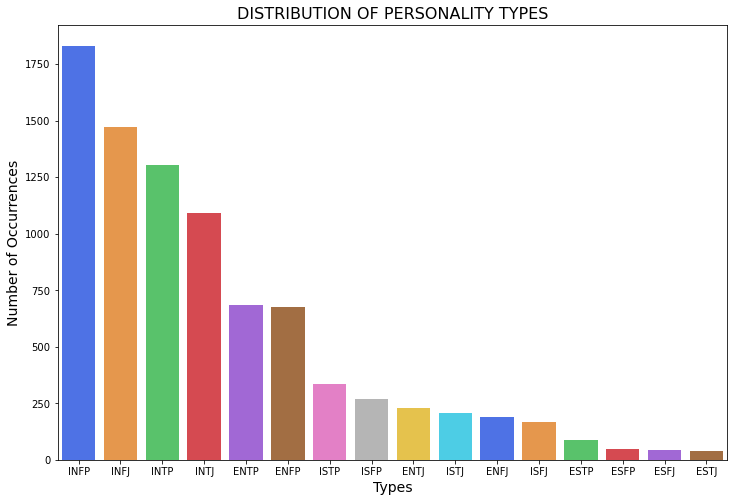

In [4]:
types = data['type'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(types.index,types.values,alpha=.8,palette='bright')
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Types', fontsize=14)
plt.title("DISTRIBUTION OF PERSONALITY TYPES",fontsize=16)
plt.show()

##                   CREATING EXTRA COLUMNS FOR EACH PERSONALITY CATEGORY

In [5]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 
df = df.join(df.apply (lambda row: get_types (row),axis=1))
y = df.iloc[:,2:6]
Y = df['type']

In [31]:
df.head(10)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,1,1,1,1
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",1,1,0,1
7,INTJ,'I tend to build up a collection of things on ...,1,1,1,1
8,INFJ,"I'm not sure, that's a good question. The dist...",1,1,0,1
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,1,1,1,0


##                          PERSONALITY TYPES CORRELATION USING HEAT MAP

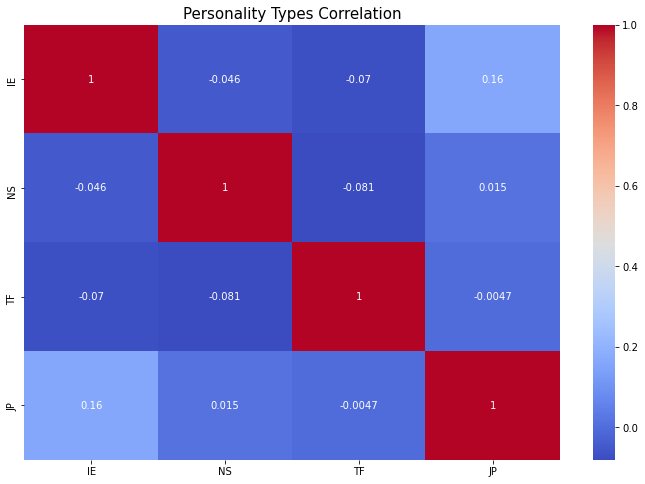

In [6]:
plt.figure(figsize=(12,8))
plt.title('Personality Types Correlation', size=15)
sns.heatmap(y.corr(),cmap='coolwarm',annot=True) 

##                                           PREPROCESSING THE DATA

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
# We want to remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

unique_type_list = [x.lower() for x in unique_type_list]

words = set(nltk.corpus.words.words())

# Lemmatize
lemmatiser = WordNetLemmatizer()

# To remove the stop words from data for speed 
StopWords = stopwords.words("english")

def pre_process_data(data):

    remove_stop_words=True
    remove_mbti_profiles=True
    features = []
    for row in data:
        # Remove and clean comments
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', row)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub("b", "", temp)
        temp = re.sub(' +', ' ', temp).lower()
        
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in StopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")
                
        temp = " ".join(w for w in nltk.wordpunct_tokenize(temp) if w in words or not w.isalpha())
        features.append(temp)
        
    features = np.array(features)
    return features


##                                      CALLING pre_process_data FUNCTION 
### 1)To remove stop words
### 2) To remove MBTI profiles from features
### 3)To remove digits,extra alphabets
### 4)To remove urls
### 5)To lemmatize data

In [8]:
Posts = data['posts']
features = pre_process_data(Posts)

## GENERATING WORDCLOUD

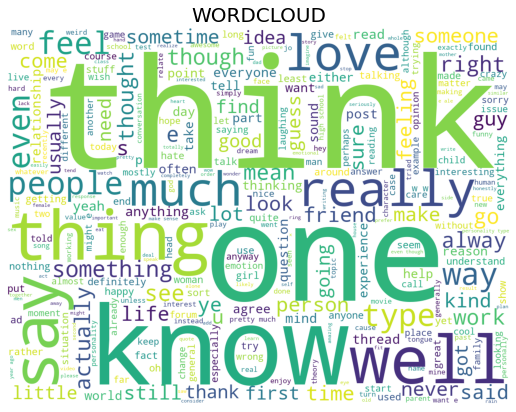

In [9]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 
stopwords.add("ut")
# plot the WordCloud image
for val in features: 
    
    # typecaste each val to string 
    val = str(val) 

    # split the value 
    tokens = val.split() 
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 900, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,max_words=300).generate(comment_words) 
plt.figure(figsize = (9,9)) 
plt.imshow(wordcloud) 
plt.title("WORDCLOUD",fontsize=20)
plt.axis("off") 
plt.show() 


##                                     TRANSFORING FEATURES TO TF-IDF REPRESENTATION

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer(analyzer="word", max_features=1500,max_df=0.7,min_df=0.1) 
X_CV = CV.fit_transform(features)

tfi = TfidfTransformer()
X =  tfi.fit_transform(X_CV).toarray()

## SPLITTING DATA FOR TRAINING AND TESTING

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

## USING RANDOM FOREST CLASSIFIER

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [13]:
sum1 = 0
model.fit(X_train,y_train['IE'])
pred1 = model.predict(X_test)
sum1 = sum1 + accuracy_score(y_test['IE'],pred1)
print("PREDICTION FOR IE: "+str(round(accuracy_score(y_test['IE'],pred1)*100,2)))

PREDICTION FOR IE: 77.41


In [14]:
model.fit(X_train,y_train['NS'])
pred1 = model.predict(X_test)
sum1 = sum1 + accuracy_score(y_test['NS'],pred1)
print("PREDICTION FOR NS: "+str(round(accuracy_score(y_test['NS'],pred1)*100,2)))

PREDICTION FOR NS: 87.67


In [15]:
model.fit(X_train,y_train['TF'])
pred1 = model.predict(X_test)
sum1 = sum1 + accuracy_score(y_test['TF'],pred1)
print("PREDICTION FOR TF: "+str(round(accuracy_score(y_test['TF'],pred1)*100,2)))

PREDICTION FOR TF: 71.41


In [16]:
model.fit(X_train,y_train['JP'])
pred1 = model.predict(X_test)
sum1 = sum1 + accuracy_score(y_test['JP'],pred1)
print("PREDICTION FOR JP: "+str(round(accuracy_score(y_test['JP'],pred1)*100,2)))

PREDICTION FOR JP: 63.52


#### OVERALL ACCURACY FOR RANDOM FOREST CLASSIFIER

In [17]:
print("overall accracy: " + str(round((sum1/4)*100,2)))

overall accracy: 75.0


## USING LOGISTIC REGRESSION

In [18]:
from sklearn.linear_model import LogisticRegression
M = LogisticRegression()

In [19]:
sum2 = 0
M.fit(X_train,y_train['IE'])
pred2 = M.predict(X_test)
sum2 = sum2 + accuracy_score(y_test['IE'],pred2)
print("PREDICTION FOR IE: "+str(round(accuracy_score(y_test['IE'],pred2)*100,2)))

PREDICTION FOR IE: 78.85


In [20]:
M.fit(X_train,y_train['NS'])
pred2 = M.predict(X_test)
sum2 = sum2 + accuracy_score(y_test['NS'],pred2)
print("PREDICTION FOR NS: "+str(round(accuracy_score(y_test['NS'],pred2)*100,2)))

PREDICTION FOR NS: 87.49


In [21]:
M.fit(X_train,y_train['TF'])
pred2 = M.predict(X_test)
sum2 = sum2 + accuracy_score(y_test['TF'],pred2)
print("PREDICTION FOR TF: "+str(round(accuracy_score(y_test['TF'],pred2)*100,2)))

PREDICTION FOR TF: 76.77


In [22]:
M.fit(X_train,y_train['JP'])
pred2 = M.predict(X_test)
sum2 = sum2 + accuracy_score(y_test['JP'],pred2)
print("PREDICTION FOR JP: "+str(round(accuracy_score(y_test['JP'],pred2)*100,2)))

PREDICTION FOR JP: 67.2


#### OVERALL ACCURACY FOR LOGISTIC REGRESSION

In [23]:
print("overall accracy: " + str(round((sum2/4)*100,2)))

overall accracy: 77.58


## USING NAIVE BAYES MULTINOMIALNB 

In [24]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

In [25]:
sum3 = 0
MNB.fit(X_train,y_train['IE'])
pred3 = MNB.predict(X_test)
sum3 = sum3 + accuracy_score(y_test['IE'],pred3)
print("PREDICTION FOR IE: "+str(round(accuracy_score(y_test['IE'],pred3)*100,2)))

PREDICTION FOR IE: 77.41


In [26]:
MNB.fit(X_train,y_train['NS'])
pred3 = MNB.predict(X_test)
sum3 = sum3 + accuracy_score(y_test['NS'],pred3)
print("PREDICTION FOR NS: "+str(round(accuracy_score(y_test['NS'],pred3)*100,2)))

PREDICTION FOR NS: 87.67


In [27]:
MNB.fit(X_train,y_train['TF'])
pred3 = MNB.predict(X_test)
sum3 = sum3 + accuracy_score(y_test['TF'],pred3)
print("PREDICTION FOR TF: "+str(round(accuracy_score(y_test['TF'],pred3)*100,2)))

PREDICTION FOR TF: 73.66


In [28]:
MNB.fit(X_train,y_train['JP'])
pred3 = MNB.predict(X_test)
sum3 = sum3 + accuracy_score(y_test['JP'],pred3)
print("PREDICTION FOR JP: "+str(round(accuracy_score(y_test['JP'],pred3)*100,2)))

PREDICTION FOR JP: 61.44


#### OVERALL ACCURACY FOR NAIVE BAYES

In [29]:
print("overall accracy: " + str(round((sum3/4)*100,2)))

overall accracy: 75.04
